# 从LeNet（左）到AlexNet（右）

- 神经网络的发展年代
<img src="./pic/神经网络的发展年代.PNG" width=400 height=400>
- 更深更大的LeNet
<img src="./pic/从LeNet到AlexNet.PNG" width=200 height=200>
- 主要改进：
    - 隐藏层全连接层后加入了【丢弃法】，来做模型的正则化
    - 激活函数从sigmoid变到了【ReLU】: 缓解梯度消失
        - 梯度比sigmoid更大，ReLU在正向情况下，梯度为1
            - 在0点处的1阶导数等于1，相对来说容易数值稳定
        - 以上两点用于支撑更深的模型
    - MaxPooling
        - 使输出的值比avepooling大，梯度也就更大，使训练变得容易
    - 数据增强
        - 随机截取
        - 随机局部亮度、色温

- 端到端学习： 
    - CNN学出来的东西，很有可能就是Softmax想要的。通过很深的神经网络把各像素map到一个空间，使得softmax很好的进行分类。从模型角度看，两者（特征和输出）是一起训练，所以更加高效。

## 复杂度
- 当前层的参数量 = 输入通道x输出通道x卷积核高x宽
    - conv1 = 3 x 96 x 11 x 11 = 34848 个权重
    - conv2 = 96 x 256 x 5 x 5 = 614400 个权重
    - conv3 = 256 x 384 x 3 x 3 = 884736 个权重
    - conv4 = 384 x 384 x 3 x 3 = 1327104 个权重
    - conv5 = 384 x 256 x 3 x 3 = 884736 个权重
    - conv3-5 = 3096576个权重
    - dense1 = 256 x 5 x 5 x 4096 = 26214400 个权重  【注意 5x5 kernel】
    - dense2 = 4096 x 4096 = 16777216 个权重
    - dense3 = 4096 x 1000 = 4096000 个权重
    - totle = conv1-5 + dense1-3 = 50m 个权重
<img src="./pic/复杂度.PNG" width=400 height=400>

## 总结
- AlexNet是更大更深的LeNet，10x参数个数，260x计算复杂度
- 新进入了丢弃法，ReLU，最大池化层，和数据增强
- AlexNet赢下了2012ImageNet竞赛后，标志着新的一轮神经网络热潮的开始

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    # 这里，我们使用一个11*11的更大窗口来捕捉对象。
    # 同时，步幅为4，以减少输出的高度和宽度。
    # 另外，输出通道的数目远大于LeNet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 使用三个连续的卷积层和较小的卷积窗口。
    # 除了最后的卷积层，输出通道的数量进一步增加。
    # 在前两个卷积层之后，汇聚层不用于减少输入的高度和宽度
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # 这里，全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过拟合
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # 最后是输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
    nn.Linear(4096, 10))

In [2]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

C:\Users\Tyler\anaconda3\envs\pytorch19\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


## Fashion-MNIST图像的分辨率低于ImageNet图像。我们将它们增加到224 x 224

In [3]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

C:\Users\Tyler\anaconda3\envs\pytorch19\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


loss 0.330, train acc 0.879, test acc 0.885
2261.5 examples/sec on cuda:0


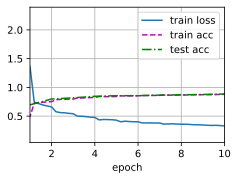

In [4]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())